# TAREA N°3 
Se sabe poco sobre los factores socio-economicos que influyen en el número de muertes por COVID en Chile.

Ahora, su tarea es construir un modelo de regresión en Python para predecir "muertes por covid" teniendo en cuenta el HDI de la comuna, y el número de vacunas administradas. Es decir, su modelo solo tiene que tomar datos desde después del 24 de diciembre de 2020, que es cuando empezamos a administrar vacunas.
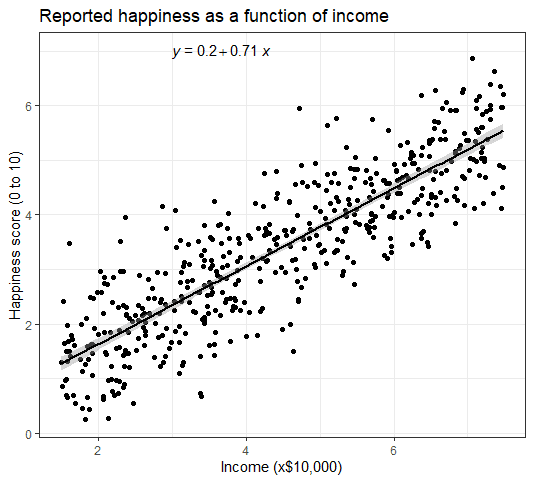

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as sm
import numpy as np

In [2]:
hdi = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
vac = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv')
falle = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto84/fallecidos_comuna_edad_totales.csv')

# Pre-proceso y limpieza de datos

In [3]:
hdi.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [4]:
hdi2 = hdi[['comuna', 'HDI']].copy()
hdi2.head()

,comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [5]:
vac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,0.0,435.0,549.0,792.0,1123.0,1069.0,421.0,0.0,1114.0,1387.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,11.0,11.0,7.0,9.0,0.0,0.0,2.0,12.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
vac2 = vac[vac['Codigo region'] == 13]
vac2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,10.0,30.0,15.0,20.0,0.0,0.0,19.0,34.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,0.0,301.0,250.0,668.0,476.0,322.0,50.0,0.0,178.0,96.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,0.0,44.0,26.0,110.0,119.0,91.0,0.0,0.0,84.0,147.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,0.0,240.0,172.0,312.0,191.0,125.0,189.0,0.0,250.0,186.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,44.0,489.0,387.0,378.0,272.0,206.0,476.0,210.0,262.0,303.0


In [7]:
vac2.columns

Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
       '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       ...
       '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
       '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13'],
      dtype='object', length=207)

In [8]:
falle.columns

Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Edad',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       ...
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07'],
      dtype='object', length=484)

Se puede visualizar como en la base de datos de fallecidos la ultima fecha sera menos actual que en vac2, por lo que ajustaremos la fecha de vac2 para no distorsionar los datos.

In [9]:
vac3 = vac2.dropna().copy()
vac3['Vacunados'] = vac3.iloc[:, 5:-5].sum(axis = 1)
vac4 = vac3[['Codigo comuna', 'Poblacion', 'Vacunados']].sort_values(['Codigo comuna']).copy()
vac4.head()

,Codigo comuna,Poblacion,Vacunados
136,13101.0,503147.0,288563.0
91,13102.0,88956.0,49699.0
92,13103.0,142465.0,74027.0
94,13104.0,139195.0,98394.0
96,13105.0,172000.0,100552.0


In [10]:
for i in vac4:
    vac4[i] = vac4[i].astype('int64')
vac4.head()


,Codigo comuna,Poblacion,Vacunados
136,13101,503147,288563
91,13102,88956,49699
92,13103,142465,74027
94,13104,139195,98394
96,13105,172000,100552


In [11]:
vac_final = vac4.copy()
vac_final['Porcentaje'] = vac_final['Vacunados']/vac_final['Poblacion']
vac_final.head()

,Codigo comuna,Poblacion,Vacunados,Porcentaje
136,13101,503147,288563,0.573516
91,13102,88956,49699,0.558692
92,13103,142465,74027,0.519615
94,13104,139195,98394,0.706879
96,13105,172000,100552,0.584605


In [12]:
falle.head()

,Region,Codigo region,Comuna,Codigo comuna,Edad,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
0,Antofagasta,2,Antofagasta,2101,<=39,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Antofagasta,2,Antofagasta,2101,40-49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Antofagasta,2,Antofagasta,2101,50-59,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Antofagasta,2,Antofagasta,2101,60-69,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Antofagasta,2,Antofagasta,2101,70-79,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
falle2 = falle[falle['Codigo region'] == 13]
falle2.head()

,Region,Codigo region,Comuna,Codigo comuna,Edad,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
1596,Metropolitana,13,Alhue,13502,<=39,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,Metropolitana,13,Alhue,13502,40-49,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,Metropolitana,13,Alhue,13502,50-59,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,Metropolitana,13,Alhue,13502,60-69,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,Metropolitana,13,Alhue,13502,70-79,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
falle3 = falle2.dropna().copy()
falle3.columns.get_loc("2020-12-24")

288

Esta es la fecha en la cual que se comenzo a administrar vacunas, desde este indice comienza el analisis.

In [15]:
falle3['Fallecidos'] = falle3.iloc[:, 288:-1].sum(axis = 1)
falle4 = falle3[['Codigo comuna', 'Edad', 'Fallecidos']].sort_values(['Codigo comuna']).copy()
falle4.head()

,Codigo comuna,Edad,Fallecidos
1938,13101,>=90,27.0
1937,13101,80-89,66.0
1936,13101,70-79,83.0
1935,13101,60-69,54.0
1934,13101,50-59,38.0


In [16]:
falle5 = falle4.groupby('Codigo comuna').sum().reset_index()
falle5.head()

,Codigo comuna,Fallecidos
0,13101,304.0
1,13102,102.0
2,13103,261.0
3,13104,214.0
4,13105,251.0


In [17]:
falle5 = falle5.rename(columns = {'Codigo comuna':'COMUNA'})
vac_final = vac_final.rename(columns = {'Codigo comuna':'COMUNA'})
union = pd.merge(vac_final, falle5, on='COMUNA')
union.head()

,COMUNA,Poblacion,Vacunados,Porcentaje,Fallecidos
0,13101,503147,288563,0.573516,304.0
1,13102,88956,49699,0.558692,102.0
2,13103,142465,74027,0.519615,261.0
3,13104,139195,98394,0.706879,214.0
4,13105,172000,100552,0.584605,251.0


In [18]:
hdi2 = hdi2.rename(columns = {'comuna':'COMUNA'})
master_total = pd.merge(hdi2, union, on='COMUNA')
master_total.head()

,COMUNA,HDI,Poblacion,Vacunados,Porcentaje,Fallecidos
0,13101,0.861222,503147,288563,0.573516,304.0
1,13102,0.764616,88956,49699,0.558692,102.0
2,13103,0.718874,142465,74027,0.519615,261.0
3,13104,0.749584,139195,98394,0.706879,214.0
4,13105,0.742015,172000,100552,0.584605,251.0


Estos son los totales, a la fecha de 2021-07-07, de vacunados y fallecidos por comuna (Lamentablemente me di cuenta tarde que no era lo que se pedia).

Ahora se procedera a agruparlos por semana.

In [19]:
falle_sem = falle3.iloc[:, 288:-1]
falle_sem.insert(0, "COMUNA", falle3['Codigo comuna'], True)
falle_sem.head()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
1596,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1599,13502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,13502,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
vac2.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,10.0,30.0,15.0,20.0,0.0,0.0,19.0,34.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,0.0,301.0,250.0,668.0,476.0,322.0,50.0,0.0,178.0,96.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,0.0,44.0,26.0,110.0,119.0,91.0,0.0,0.0,84.0,147.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,0.0,240.0,172.0,312.0,191.0,125.0,189.0,0.0,250.0,186.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,44.0,489.0,387.0,378.0,272.0,206.0,476.0,210.0,262.0,303.0


In [21]:
vac_sem = vac2.iloc[:, 5:-6]
vac_sem.insert(0, "COMUNA", vac2['Codigo comuna'], True)
vac_sem.insert(1, "Poblacion", vac2['Poblacion'], True)
vac_sem.head()

,COMUNA,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
88,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,16.0,21.0,44.0,0.0,0.0,15.0,10.0,30.0
89,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,285.0,448.0,842.0,464.0,188.0,0.0,301.0,250.0,668.0
90,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,63.0,39.0,176.0,81.0,0.0,0.0,44.0,26.0,110.0
91,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,47.0,95.0,317.0,314.0,144.0,0.0,240.0,172.0,312.0
92,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,472.0,539.0,728.0,563.0,298.0,44.0,489.0,387.0,378.0


In [22]:
vac_sem.isna().any()

COMUNA        True
Poblacion     True
2020-12-24    True
2020-12-25    True
2020-12-26    True
              ... 
2021-07-03    True
2021-07-04    True
2021-07-05    True
2021-07-06    True
2021-07-07    True
Length: 198, dtype: bool

In [23]:
vac_sem.tail()

,COMUNA,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
136,13101.0,503147.0,280.0,509.0,389.0,50.0,0.0,0.0,0.0,0.0,...,0.0,184.0,246.0,713.0,675.0,271.0,0.0,582.0,572.0,845.0
137,13601.0,81838.0,0.0,50.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135.0,261.0,478.0,329.0,217.0,0.0,182.0,135.0,321.0
138,13303.0,21477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,31.0,119.0,68.0,0.0,0.0,34.0,28.0,57.0
139,13132.0,96774.0,0.0,55.0,145.0,140.0,0.0,0.0,0.0,0.0,...,0.0,75.0,88.0,385.0,228.0,94.0,0.0,77.0,65.0,333.0
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
vac_sem2 = vac_sem.copy()
vac_sem2.drop(vac_sem2.tail(1).index, inplace=True)
vac_sem2.tail()

,COMUNA,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,...,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07
135,13131.0,86510.0,0.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,...,90.0,294.0,304.0,434.0,314.0,144.0,151.0,249.0,211.0,242.0
136,13101.0,503147.0,280.0,509.0,389.0,50.0,0.0,0.0,0.0,0.0,...,0.0,184.0,246.0,713.0,675.0,271.0,0.0,582.0,572.0,845.0
137,13601.0,81838.0,0.0,50.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135.0,261.0,478.0,329.0,217.0,0.0,182.0,135.0,321.0
138,13303.0,21477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,31.0,119.0,68.0,0.0,0.0,34.0,28.0,57.0
139,13132.0,96774.0,0.0,55.0,145.0,140.0,0.0,0.0,0.0,0.0,...,0.0,75.0,88.0,385.0,228.0,94.0,0.0,77.0,65.0,333.0


In [25]:
falle_sem.isna().any()

COMUNA        False
2020-12-24    False
2020-12-25    False
2020-12-26    False
2020-12-27    False
              ...  
2021-07-03    False
2021-07-04    False
2021-07-05    False
2021-07-06    False
2021-07-07    False
Length: 197, dtype: bool

In [26]:
len(vac_sem2.index)

52

In [27]:
len(falle_sem.index)

364

Aca se puede observar como los datos no estan agrupados por comuna.

In [28]:
falle_sem2 = falle_sem.groupby('COMUNA').sum().reset_index()
len(falle_sem2.index)

52

En este punto se tiene el numero de vacunados y fallecidos diarios, ambos diferenciados por comuna y con un rango desde 2020-12-24 al 2021-07-07. 

La existencia 197 columnas (198 por la de poblacion adicional), 52 filas y la inexistencia de NaN en ambos confirma que se puede proceder.

Se sabe que 196 columnas pertenecen a fechas, lo que convenientemente otorga 28 semanas exactas y facilitara la segmentacion.

In [29]:
falle_sem_fin = falle_sem2.copy()
inferior = 1
semana = 1
cuenta = 1
for u in range(1,197):
    if cuenta == 7:
        superior = u
        falle_sem_fin[str(semana)] = falle_sem_fin.iloc[:, inferior:superior].sum(axis = 1)
        
        inferior = superior + 1
        semana += 1
        cuenta = 0
    
    cuenta+=1

falle_sem_fin.head()

,COMUNA,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,...,19,20,21,22,23,24,25,26,27,28
0,13101,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,13102,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,13103,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,13104,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,13105,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


In [30]:
falle_sem_fin2 = falle_sem_fin.iloc[:, -28:]
falle_sem_fin2.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,3.0,4.0,2.0,8.0,9.0,8.0,8.0,12.0,9.0,5.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,1.0,2.0,1.0,2.0,0.0,1.0,1.0,5.0,1.0,5.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,3.0,5.0,5.0,3.0,5.0,2.0,7.0,6.0,5.0,4.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,3.0,1.0,1.0,5.0,4.0,4.0,5.0,7.0,4.0,6.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,2.0,4.0,2.0,7.0,8.0,5.0,7.0,6.0,6.0,1.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


In [31]:
fallecidos = falle_sem_fin2.copy()
fallecidos.insert(0, "COMUNA", falle_sem_fin['COMUNA'], True)
fallecidos.head()

,COMUNA,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,13101,3.0,4.0,2.0,8.0,9.0,8.0,8.0,12.0,9.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,13102,1.0,2.0,1.0,2.0,0.0,1.0,1.0,5.0,1.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,13103,3.0,5.0,5.0,3.0,5.0,2.0,7.0,6.0,5.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,13104,3.0,1.0,1.0,5.0,4.0,4.0,5.0,7.0,4.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,13105,2.0,4.0,2.0,7.0,8.0,5.0,7.0,6.0,6.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


Se repite el proceso para la base de datos perteneciente a vacunados.

In [32]:
vac_sem_fin = vac_sem2.copy()
inferior = 2
semana = 1
cuenta = 1
for u in range(2,198):
    if cuenta == 7:
        superior = u
        vac_sem_fin[str(semana)] = vac_sem_fin.iloc[:, inferior:superior].sum(axis = 1)
        
        inferior = superior + 1
        semana += 1
        cuenta = 0
    
    cuenta+=1

vac_sem_fin.head()

,COMUNA,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,...,19,20,21,22,23,24,25,26,27,28
88,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.0,267.0,326.0,369.0,340.0,317.0,245.0,139.0,64.0,90.0
89,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1406.0,2985.0,4011.0,3268.0,4936.0,836.0,2886.0,1857.0,926.0,2045.0
90,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,558.0,717.0,781.0,670.0,922.0,253.0,725.0,519.0,159.0,327.0
91,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,899.0,1467.0,1655.0,1885.0,2565.0,454.0,1892.0,908.0,209.0,1187.0
92,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1404.0,2029.0,2200.0,3667.0,4982.0,1915.0,2873.0,1799.0,1129.0,2509.0


In [33]:
vac_sem_fin2 = vac_sem_fin.iloc[:, -28:]
vac_sem_fin2.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
88,0.0,0.0,0.0,0.0,0.0,0.0,281.0,376.0,313.0,240.0,...,95.0,267.0,326.0,369.0,340.0,317.0,245.0,139.0,64.0,90.0
89,0.0,0.0,0.0,25.0,0.0,210.0,3680.0,3870.0,2154.0,2292.0,...,1406.0,2985.0,4011.0,3268.0,4936.0,836.0,2886.0,1857.0,926.0,2045.0
90,0.0,0.0,0.0,0.0,0.0,0.0,1043.0,1796.0,986.0,801.0,...,558.0,717.0,781.0,670.0,922.0,253.0,725.0,519.0,159.0,327.0
91,0.0,0.0,0.0,0.0,0.0,82.0,3177.0,3507.0,1994.0,1670.0,...,899.0,1467.0,1655.0,1885.0,2565.0,454.0,1892.0,908.0,209.0,1187.0
92,0.0,0.0,0.0,0.0,0.0,0.0,3725.0,5559.0,2353.0,1772.0,...,1404.0,2029.0,2200.0,3667.0,4982.0,1915.0,2873.0,1799.0,1129.0,2509.0


In [34]:
vacunados = vac_sem_fin2.copy()
vacunados.insert(0, "COMUNA", vac_sem_fin['COMUNA'], True)
vacunados.insert(1, "Poblacion", vac_sem_fin['Poblacion'], True)
vacunados = vacunados.sort_values(['COMUNA'])
vacunados.head()

,COMUNA,Poblacion,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
136,13101.0,503147.0,1228.0,0.0,0.0,48.0,36.0,513.0,19985.0,24011.0,...,5330.0,9720.0,12286.0,9549.0,13181.0,2413.0,8119.0,4624.0,514.0,2813.0
91,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,82.0,3177.0,3507.0,...,899.0,1467.0,1655.0,1885.0,2565.0,454.0,1892.0,908.0,209.0,1187.0
92,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,0.0,3725.0,5559.0,...,1404.0,2029.0,2200.0,3667.0,4982.0,1915.0,2873.0,1799.0,1129.0,2509.0
94,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,0.0,5671.0,6909.0,...,1722.0,2892.0,2817.0,4514.0,6120.0,992.0,3072.0,2679.0,1741.0,2571.0
96,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,0.0,4184.0,6782.0,...,1417.0,2762.0,3605.0,4860.0,6626.0,1444.0,3991.0,3152.0,1592.0,2900.0


In [35]:
fallecidos.head()

,COMUNA,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,13101,3.0,4.0,2.0,8.0,9.0,8.0,8.0,12.0,9.0,...,5.0,9.0,14.0,7.0,16.0,22.0,14.0,14.0,15.0,14.0
1,13102,1.0,2.0,1.0,2.0,0.0,1.0,1.0,5.0,1.0,...,6.0,6.0,4.0,4.0,3.0,2.0,2.0,5.0,9.0,6.0
2,13103,3.0,5.0,5.0,3.0,5.0,2.0,7.0,6.0,5.0,...,14.0,14.0,6.0,12.0,17.0,12.0,11.0,19.0,15.0,10.0
3,13104,3.0,1.0,1.0,5.0,4.0,4.0,5.0,7.0,4.0,...,5.0,8.0,5.0,14.0,11.0,14.0,7.0,10.0,14.0,7.0
4,13105,2.0,4.0,2.0,7.0,8.0,5.0,7.0,6.0,6.0,...,11.0,11.0,11.0,8.0,19.0,11.0,11.0,10.0,11.0,10.0


In [36]:
pob = vacunados[['COMUNA', 'Poblacion']].rename(columns = {'COMUNA':'Comuna'}).copy()
pob.head()

,Comuna,Poblacion
136,13101.0,503147.0
91,13102.0,88956.0
92,13103.0,142465.0
94,13104.0,139195.0
96,13105.0,172000.0


In [37]:
len(vacunados.index)

52

In [38]:
len(fallecidos.index)

52

In [39]:
len(hdi2)

52

In [40]:
len(pob)

52

In [41]:
vals = list(fallecidos.columns)[1:29]
ids = list(fallecidos.columns)[0]
fallecidos2 = pd.melt(fallecidos, value_vars=vals, id_vars=ids)
fallecidos2

,COMUNA,variable,value
0,13101,1,3.0
1,13102,1,1.0
2,13103,1,3.0
3,13104,1,3.0
4,13105,1,2.0
...,...,...,...
1451,13601,28,10.0
1452,13602,28,3.0
1453,13603,28,3.0
1454,13604,28,4.0


In [42]:
vals = list(vacunados.columns)[2:30]
ids = list(vacunados.columns)[0]
vacunados2 = pd.melt(vacunados, value_vars=vals, id_vars=ids)
vacunados2

,COMUNA,variable,value
0,13101.0,1,1228.0
1,13102.0,1,0.0
2,13103.0,1,0.0
3,13104.0,1,0.0
4,13105.0,1,0.0
...,...,...,...
1451,13601.0,28,1341.0
1452,13602.0,28,383.0
1453,13603.0,28,439.0
1454,13604.0,28,1533.0


In [43]:
fallecidos2 = fallecidos2.rename(columns = {'COMUNA':'Comuna', 'variable':'Semana', 'value':'Fallecidos'})
fallecidos2

,Comuna,Semana,Fallecidos
0,13101,1,3.0
1,13102,1,1.0
2,13103,1,3.0
3,13104,1,3.0
4,13105,1,2.0
...,...,...,...
1451,13601,28,10.0
1452,13602,28,3.0
1453,13603,28,3.0
1454,13604,28,4.0


In [44]:
vacunados2 = vacunados2.rename(columns = {'COMUNA':'Comuna', 'variable':'Semana', 'value':'Vacunados'})
vacunados2

,Comuna,Semana,Vacunados
0,13101.0,1,1228.0
1,13102.0,1,0.0
2,13103.0,1,0.0
3,13104.0,1,0.0
4,13105.0,1,0.0
...,...,...,...
1451,13601.0,28,1341.0
1452,13602.0,28,383.0
1453,13603.0,28,439.0
1454,13604.0,28,1533.0


In [45]:
master_semanal = pd.merge(vacunados2, fallecidos2, on=['Comuna', 'Semana'])
master_semanal

,Comuna,Semana,Vacunados,Fallecidos
0,13101.0,1,1228.0,3.0
1,13102.0,1,0.0,1.0
2,13103.0,1,0.0,3.0
3,13104.0,1,0.0,3.0
4,13105.0,1,0.0,2.0
...,...,...,...,...
1451,13601.0,28,1341.0,10.0
1452,13602.0,28,383.0,3.0
1453,13603.0,28,439.0,3.0
1454,13604.0,28,1533.0,4.0


In [46]:
hdi2.rename(columns = {'COMUNA':'Comuna'}, inplace = True)
hdi2.head()

,Comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015


In [47]:
master_semanal = pd.merge(hdi2, master_semanal, on='Comuna')
master_semanal

,Comuna,HDI,Semana,Vacunados,Fallecidos
0,13101,0.861222,1,1228.0,3.0
1,13101,0.861222,2,0.0,4.0
2,13101,0.861222,3,0.0,2.0
3,13101,0.861222,4,48.0,8.0
4,13101,0.861222,5,36.0,9.0
...,...,...,...,...,...
1451,13605,0.760697,24,259.0,10.0
1452,13605,0.760697,25,2414.0,7.0
1453,13605,0.760697,26,1569.0,6.0
1454,13605,0.760697,27,923.0,6.0


In [48]:
master_semanal = pd.merge(master_semanal, pob, on='Comuna')
master_semanal

,Comuna,HDI,Semana,Vacunados,Fallecidos,Poblacion
0,13101,0.861222,1,1228.0,3.0,503147.0
1,13101,0.861222,2,0.0,4.0,503147.0
2,13101,0.861222,3,0.0,2.0,503147.0
3,13101,0.861222,4,48.0,8.0,503147.0
4,13101,0.861222,5,36.0,9.0,503147.0
...,...,...,...,...,...,...
1451,13605,0.760697,24,259.0,10.0,101058.0
1452,13605,0.760697,25,2414.0,7.0,101058.0
1453,13605,0.760697,26,1569.0,6.0,101058.0
1454,13605,0.760697,27,923.0,6.0,101058.0


In [49]:
master_semanal['100K'] = (master_semanal['Fallecidos']/master_semanal['Poblacion'])*100000
master_semanal

,Comuna,HDI,Semana,Vacunados,Fallecidos,Poblacion,100K
0,13101,0.861222,1,1228.0,3.0,503147.0,0.596247
1,13101,0.861222,2,0.0,4.0,503147.0,0.794996
2,13101,0.861222,3,0.0,2.0,503147.0,0.397498
3,13101,0.861222,4,48.0,8.0,503147.0,1.589993
4,13101,0.861222,5,36.0,9.0,503147.0,1.788742
...,...,...,...,...,...,...,...
1451,13605,0.760697,24,259.0,10.0,101058.0,9.895308
1452,13605,0.760697,25,2414.0,7.0,101058.0,6.926715
1453,13605,0.760697,26,1569.0,6.0,101058.0,5.937185
1454,13605,0.760697,27,923.0,6.0,101058.0,5.937185


In [50]:
master_total['100K'] = (master_total['Fallecidos']/master_total['Poblacion'])*100000
master_total.head()

,COMUNA,HDI,Poblacion,Vacunados,Porcentaje,Fallecidos,100K
0,13101,0.861222,503147,288563,0.573516,304.0,60.419718
1,13102,0.764616,88956,49699,0.558692,102.0,114.663429
2,13103,0.718874,142465,74027,0.519615,261.0,183.202892
3,13104,0.749584,139195,98394,0.706879,214.0,153.741154
4,13105,0.742015,172000,100552,0.584605,251.0,145.930233


In [51]:
master_semanal.dtypes

Comuna          int64
HDI           float64
Semana         object
Vacunados     float64
Fallecidos    float64
Poblacion     float64
100K          float64
dtype: object

In [52]:
master_semanal['Semana'] = master_semanal['Semana'].astype('int64')
master_semanal.dtypes

Comuna          int64
HDI           float64
Semana          int64
Vacunados     float64
Fallecidos    float64
Poblacion     float64
100K          float64
dtype: object

In [53]:
master_total.dtypes

COMUNA          int64
HDI           float64
Poblacion       int64
Vacunados       int64
Porcentaje    float64
Fallecidos    float64
100K          float64
dtype: object

# Graficos

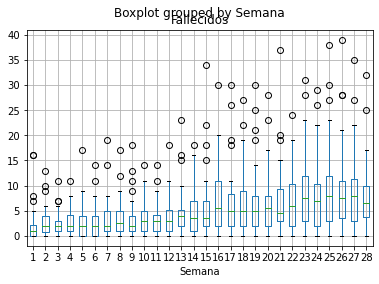

In [54]:
master_semanal.boxplot(column='Fallecidos', by='Semana')

Este grafico permite apreciar como a medida que pasan las semanas el numero de fallecidos aumenta.

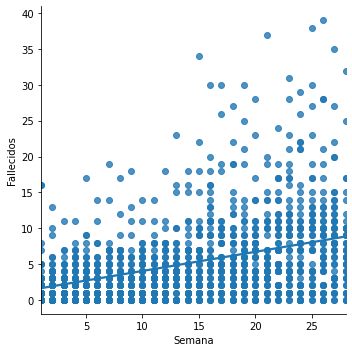

In [55]:
sb.lmplot(x = "Semana",
            y = "Fallecidos", 
            ci = None,
            data = master_semanal)

Misma informacion presentada de otra manera.

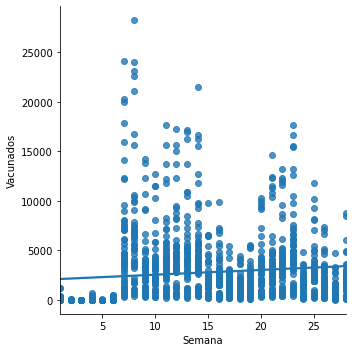

In [205]:
sb.lmplot(x = "Semana",
            y = "Vacunados", 
            ci = None,
            data = master_semanal)

Este grafico permite apreciar como el numero de vacunados semanal tiene un ligero incremento a medida que pasa el tiempo, muy pequeño pero existe.

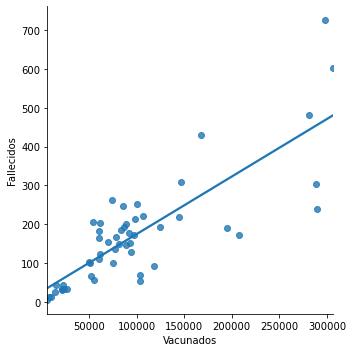

In [60]:
sb.lmplot(x = "Vacunados",
            y = "Fallecidos", 
            ci = None,
            data = master_total)

Aqui existe un claro ejemplo de la gran importancia que tiene el saber que informacion te entrega una grafica. A simple vista se puede apreciar que a medida que existe un mayor numero de vacunados en una comuna, esta posee un mayor numero de fallecidos.

Esto no quiere decir que debido a las vacunas la gente tenga una mayor probabilidad de muerte (podria ser el caso, pero esto no es la evidencia empirica de esto), ya que correlacion no es lo mismo que causa. Ahora, haciendo memoria sobre la Tarea 2, se evidencio la alta correlacion entre el numero de vacunados y la poblacion de una comuna: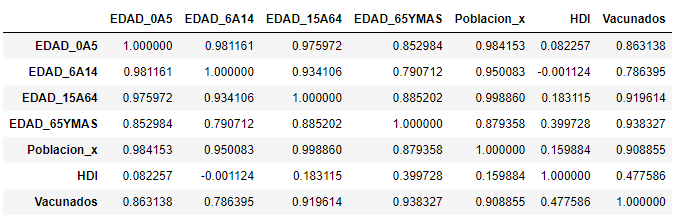

Lamentablemente, no se realizo un analisis de correlacion entre la poblacion de una sociedad y su numero de fallecidos, pero se podria hacer uso de sentido comun para suponer como mientras mayor sea su poblacion, mayor sera su numero de fallecidos.

Esto podria explicar, como a medida que existe un mayor numero de vacunados, debido a una mayor poblacion, existe un mayor numero de fallecidos.

Cabe recalcar de igual manera, que la respuesta al por qué de este enigma perfectamente podria ser una razon completamente diferente a las anteriormente mencionadas. Como Data Scientist (en formacion), no se posee la experiencia profesional de un Biologo, ni un Sociologo, ni algun otro ologo como para evidenciar la veracidad indiscutible de las conclusiones a las que se llegan, solo se esta comunicando lo que se puede observar a traves de los datos.

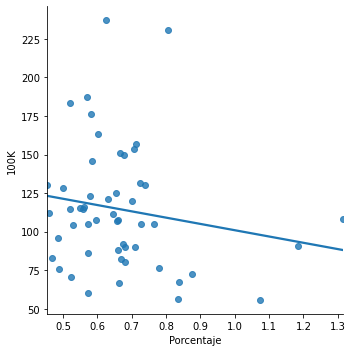

In [62]:
sb.lmplot(x = "Porcentaje",
            y = "100K", 
            ci = None,
            data = master_total)

En esta grafica, en vez de exponer el numero de fallecidos vs el numero de vacunados, se mostro el numero de fallecidos cada 100.000 habitantes vs el porcentaje de vacunados. Lo que se logra con esto es eliminar las posibles distorsiones que generaba el numero de habitantes de cada comuna. 

Claramente, se puede apreciar como en una comuna a medida que existe un mayor porcentaje de vacunacion, menor seran sus muertes cada 100.000 habitantes.

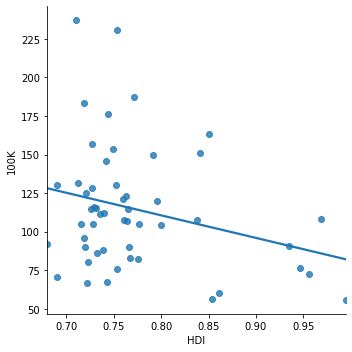

In [61]:
sb.lmplot(x = "HDI",
            y = "100K", 
            ci = None,
            data = master_total)

A mayor indice de desarrollo humano de una comuna, menor sera su numero de fallecidos cada 100.000 habitantes.

¿Tendra algo que ver con las conclusiones obtenidas en la tarea 2? (+HDI-> +EDAD-> +VACU.-> -MUERTES)

# Modelo

In [66]:
modelo = sm.ols(formula='Fallecidos ~ Vacunados + HDI', data=master_total).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             Fallecidos   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     106.2
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.53e-18
Time:                        14:30:36   Log-Likelihood:                -287.24
No. Observations:                  52   AIC:                             580.5
Df Residuals:                      49   BIC:                             586.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    623.3478     97.627      6.385      0.0

In [78]:
modelo4 = sm.ols(formula='Vacunados ~ Fallecidos + HDI', data=master_total).fit()
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:              Vacunados   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.9
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           5.55e-21
Time:                        17:55:47   Log-Likelihood:                -609.43
No. Observations:                  52   AIC:                             1225.
Df Residuals:                      49   BIC:                             1231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.263e+05   4.51e+04     -7.240      0.0